In [1]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import seaborn as sns
from datetime import datetime
import math

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Install File

In [2]:
nameCSV = 'melville_ACTUAL_FILEEE.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]
len(lat)

2998

## Calculate mean value of each satellite track 

In [3]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2639


## Make ndarray(alltime) and list(days2) that has dates

In [4]:
alltime = num2date(tt[:],u'days since 1985-01-01 00:00:00 UTC')

In [5]:
# use this to make year/month df

def getMeanH(month,year):
    valwh = []
    for k in range(len(days)):
        if alltime[k].year == year and alltime[k].month == month:
            valwh.append(wh[days[k]])

    return np.mean(valwh)


monthYear = []
for k in range(1,13):
    monthYear.append(getMeanH(k,1986))

print monthYear
#     print alltime[k].year #,wh[days[k]]

[0.5147500038146973, 0.3118000030517578, 0.5635000467300415, 1.6778647154569626, 2.049000024795532, 1.5727500915527344, 2.0393611192703247, 1.5413334369659424, 1.0766857465108235, nan, 1.273769199848175, 1.0260000427563984]


/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
monthYear

[0.5147500038146973,
 0.3118000030517578,
 0.5635000467300415,
 1.6778647154569626,
 2.049000024795532,
 1.5727500915527344,
 2.0393611192703247,
 1.5413334369659424,
 1.0766857465108235,
 nan,
 1.273769199848175,
 1.0260000427563984]

In [7]:
days2 = [] #daystart
for k in range(len(alltime)):
       
    t1 = alltime[k]
    if k == 0: #get day 0. Then else: every day after that
        days2.append(alltime[k])
        dd =alltime[k]
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days2.append(alltime[k])
            it += 1
            dd = alltime[k]
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2639


In [8]:
days2

[datetime.datetime(1985, 4, 5, 21, 27, 30, 469790),
 datetime.datetime(1985, 4, 14, 9, 26, 31, 513184),
 datetime.datetime(1985, 5, 7, 11, 6, 14, 88943),
 datetime.datetime(1985, 5, 30, 12, 45, 54, 566106),
 datetime.datetime(1985, 6, 2, 12, 54, 42, 804684),
 datetime.datetime(1985, 6, 25, 14, 34, 14, 719868),
 datetime.datetime(1985, 8, 10, 17, 53, 29, 313367),
 datetime.datetime(1985, 9, 2, 19, 32, 58, 781247),
 datetime.datetime(1985, 9, 5, 19, 41, 45, 54690),
 datetime.datetime(1985, 9, 28, 21, 21, 12, 227023),
 datetime.datetime(1985, 10, 16, 11, 10, 26, 379465),
 datetime.datetime(1985, 11, 8, 12, 49, 40, 654948),
 datetime.datetime(1985, 11, 14, 0, 39, 52, 969910),
 datetime.datetime(1985, 12, 7, 2, 18, 58, 426560),
 datetime.datetime(1986, 1, 19, 17, 56, 10, 249999),
 datetime.datetime(1986, 2, 11, 19, 35, 15, 709374),
 datetime.datetime(1986, 3, 12, 9, 3, 50, 362630),
 datetime.datetime(1986, 4, 4, 10, 42, 45, 532226),
 datetime.datetime(1986, 4, 7, 10, 51, 29, 847656),
 datet

## WAVE PERIOD EQN

$ \epsilon = 3.25 \left( H_s^2 g^2/U^4 \right)^{0.31}$



In [9]:
def waveage(H, U, grav=9.80665):
    '''
    The pseudo wave age can be expressed in terms of significant wave height and surface wind speed.
    '''

    grav2 = grav**2
    hs2 = np.square(H) 
    u4 = np.power(U,4)
    tmp = np.divide(hs2*grav2,u4)
    eps = 3.25*np.power(tmp,0.31)
    
    return eps


def waveperiod(H, U, grav=9.80665):
    '''
    Wave age from GA-2, Govindan et al.
    '''

    eps = waveage(H, U, grav=9.80665)
    period = (((eps-(5.78))/(eps+(U/(H*((U/H)+H)))))+(H+(5.70)))
    
    return period

In [10]:
T = waveperiod(wh,ws)
print T
print len(T),len(wh)

[5.1940376  5.56986478 5.31512902 ... 5.57214165 4.4818197  5.22972275]
2998 2998


In [11]:
dayswh = wh[days] #wave height for each satellite pass
daysTz = T[days]

print len(dayswh)
print len(daysTz)

2639
2639


In [12]:
dayswh

array([1.36339998, 1.351125  , 1.34530771, ..., 2.64020023, 1.34984618,
       0.8967273 ])

In [13]:
days_meanwh = np.mean(wh[days])
print days_meanwh

1.6590393571608488


## Calculate Wave Power



### Total Wave Energy
$E = \frac{1}{8} \left(pgH_s^2\right) $


In [14]:
#Is this right?

def totalwaveenergy(H):
    
    '''
    The total wave energy can be calculated using Hs, gravity and water density
    '''
    
    x = 1./8.
    p = 1025. #sea water density, kg/m^3
    g = 9.80665
    h2 = np.square(H) 
    
    pgh = p*g*h2
    
    e = x*pgh
    
    return e

In [15]:
we = totalwaveenergy(wh)

In [16]:
we

array([2335.61428134, 2293.74753514, 2274.03850912, ..., 8758.47075594,
       2289.40758556, 1010.35812679])

### Wave energy speed / Wave Velocity
$Cg = \frac{gTz}{2\pi}n$


In [17]:
def wavespeed(T):
    '''
    Wave group speed
    '''
    
    g =9.80665
    ts = T #wave period
    pi = 2*math.pi
    n=0.5
    
    top = g*ts
    
    Cg = n *(np.divide(top,pi))
    
    return Cg
    

In [18]:
Cg = wavespeed(T)
Cg

array([4.05336675, 4.34665793, 4.14786509, ..., 4.34843477, 3.49756016,
       4.08121503])

### Wave Energy Flux
$P = ECg$

In [19]:
def waveenergyflux(H,T):
    '''
    The rate at which energy is carried by waves, determined using total wave energy and wave energy speed
    '''
    
    e = totalwaveenergy(H)
    Cg = wavespeed(T)
    
    P = e * Cg
    
    return P
    
    

In [20]:
power1 = waveenergyflux(wh,T)

In [21]:
pp = power1[days]

In [26]:
print pp.shape, power1.shape, 'therefore use pp in df'

(2639,) (2998,) therefore use pp in df


In [27]:
print dayswh.shape
print daysTz.shape

(2639,)
(2639,)


In [28]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "period":daysTz, "power":pp})
df.to_csv("./melville_timeseries.csv", sep=',',index=False)
df

date    period         power        wh
0    1985-04-05 21:27:30.469790  5.194038   9467.101278  1.363400
1    1985-04-14 09:26:31.513184  5.569865   9970.135906  1.351125
2    1985-05-07 11:06:14.088943  5.315129   9432.404955  1.345308
3    1985-05-30 12:45:54.566106  6.179491  25035.795013  2.032692
4    1985-06-02 12:54:42.804684  5.682883  14732.457079  1.626000
5    1985-06-25 14:34:14.719868  4.322023   3608.728309  0.922786
6    1985-08-10 17:53:29.313367  5.121676   9093.948449  1.345667
7    1985-09-02 19:32:58.781247  5.294743  27787.484638  2.313500
8    1985-09-05 19:41:45.054690  5.488118  31029.988008  2.401300
9    1985-09-28 21:21:12.227023  4.629636   8159.796598  1.340706
10   1985-10-16 11:10:26.379465  3.523520    363.647327  0.324429
11   1985-11-08 12:49:40.654948  5.608650  20254.025856  1.919083
12   1985-11-14 00:39:52.969910  6.158311  12074.364219  1.414063
13   1985-12-07 02:18:58.426560  5.188205   8277.736566  1.275600
14   1986-01-19 17:56:10.249999  4.969925   1291.242792  0.514750
15   1986-02-11 19:35:15.709374  6.189666    590.044518  0.311800
16   1986-03-12 09:03:50.362630  3.458356   1076.769982  0.563500
17   1986-04-04 10:42:45.532226  6.499002  45407.886415  2.669375
18   1986-04-07 10:51:29.847656  4.824233  15309.325497  1.799000
19   1986-04-27 12:21:35.900392  4.217593    582.333207  0.375250
20   1986-04-30 12:30:16.296876  5.250681  17962.109090  1.867833
21   1986-05-20 14:00:18.828125  8.143098  33522.696326  2.049000
22   1986-06-15 15:47:27.441408  5.413686  13130.397234  1.572750
23   1986-07-08 17:26:04.973959  5.587744  12069.789844  1.484222
24   1986-07-31 19:04:30.748437  6.301668  41593.768999  2.594500
25   1986-08-23 20:43:03.382813  5.494467  12799.237784  1.541333
26   1986-09-07 10:23:24.462890  5.344850  16419.029739  1.770000
27   1986-09-15 22:21:26.709374  4.338072   1072.792097  0.502200
28   1986-09-30 12:01:47.789062  5.054543   4547.248625  0.957857
29   1986-11-09 14:52:02.053126  4.547790   5312.351756  1.091467
...                         ...       ...           ...       ...
2609 2018-12-01 03:37:32.655134  6.294440   2747.100611  0.667154
2610 2018-12-03 04:04:51.201171  5.408299   1425.685365  0.518500
2611 2018-12-04 00:10:19.000000  4.215503    764.278774  0.430000
2612 2018-12-06 19:21:34.386719  5.116028   5561.428920  1.052917
2613 2018-12-08 14:09:28.256945  6.485786  41768.596499  2.562778
2614 2018-12-14 04:04:16.225652  5.202233   2600.954331  0.714067
2615 2018-12-16 11:37:41.693576  4.129702   1873.386342  0.680177
2616 2018-12-18 00:07:49.085961  4.466290   3093.242041  0.840429
2617 2018-12-20 12:25:10.000001  4.899428    890.464114  0.430529
2618 2018-12-23 10:02:13.971794  4.577285   4385.235133  0.988462
2619 2018-12-26 06:25:37.774357  5.936484  11286.695566  1.392471
2620 2018-12-28 06:23:11.646485  6.535309  43185.799568  2.596000
2621 2018-12-31 00:10:18.000000  7.034519  49761.432850  2.685941
2622 2019-01-01 22:00:25.808594  5.827769  35166.872463  2.480750
2623 2019-01-02 17:59:01.788602  6.911900  58738.267958  2.943941
2624 2019-01-04 17:56:34.921876  7.521835  26270.506854  1.887294
2625 2019-01-07 08:05:03.540799  7.447120  13303.879295  1.349778
2626 2019-01-11 19:58:57.162760  4.496913   2439.670754  0.743833
2627 2019-01-15 05:34:22.194011  5.688763   7441.272849  1.155000
2628 2019-01-16 12:25:14.000000  5.119002  12351.897956  1.568706
2629 2019-01-17 06:03:35.913630  5.276335  11208.508019  1.471889
2630 2019-01-21 17:57:29.449218  5.808541  13723.213123  1.552250
2631 2019-01-24 05:00:38.543186  6.136800   7777.562451  1.136889
2632 2019-01-26 04:58:12.100043  5.495209  25108.502550  2.158667
2633 2019-01-27 00:10:21.000000  5.557404  38626.719004  2.662412
2634 2019-01-29 17:41:30.265068  5.777615  35643.846882  2.508334
2635 2019-02-01 02:04:30.294824  5.073407  20983.665586  2.053800
2636 2019-02-06 02:00:40.082422  5.572142  38085.638779  2.640200
2637 2019-02-10 13:54:33.878606  4.481820   8007.340752  1.349846
2

In [29]:
df[400:500]

date    period         power        wh
400 1997-02-23 19:45:31.252841  5.622357  18751.416225  1.844273
401 1997-02-27 00:41:12.031652  4.862903   7887.912548  1.286176
402 1997-03-01 05:50:09.314670  4.902407  10573.582809  1.483111
403 1997-03-06 21:36:27.590960  6.071151  48145.092877  2.843857
404 1997-03-17 15:37:57.909385  6.450649  41691.281939  2.567369
405 1997-03-25 13:41:05.400000  6.185229   1425.431498  0.484800
406 1997-03-28 12:56:41.212776  4.611314   7245.639607  1.265882
407 1997-03-30 23:45:44.125000  5.375077  20569.731248  1.975556
408 1997-04-03 00:41:12.305061  5.193818  15380.253205  1.737824
409 1997-04-04 11:39:38.141335  4.905660  10947.929215  1.508636
410 1997-04-09 21:44:16.067710  5.281541  19259.293342  1.928445
411 1997-04-14 09:38:09.787760  6.020868  40969.996972  2.634333
412 1997-04-19 00:38:18.697725  5.736227  23140.822601  2.028353
413 1997-04-24 07:36:41.423828  6.563345  70559.063564  3.311167
414 1997-04-29 17:41:19.734375  6.233594  48164.058004  2.807111
415 1997-05-02 12:56:40.290900  5.850772  27239.119946  2.179000
416 1997-05-04 05:35:13.253906  6.282396  28044.258551  2.133667
417 1997-05-08 00:41:12.288861  5.064320   8336.043342  1.295647
418 1997-05-09 15:39:51.043403  5.319229  21326.724459  2.022111
419 1997-05-14 03:33:45.066732  5.426477  25232.840242  2.177667
420 1997-05-19 13:38:22.623265  5.143096   9738.933201  1.389667
421 1997-05-24 00:38:20.827823  5.657222   5099.089608  0.958765
422 1997-05-29 11:36:54.967012  5.020155   8569.685173  1.319445
423 1997-06-02 23:30:48.899147  5.237295  13700.557224  1.633364
424 1997-06-06 12:56:43.073989  5.622026  21971.439300  1.996412
425 1997-06-12 00:41:14.589925  6.166547  45016.640444  2.728556
426 1997-06-20 18:54:37.041797  6.056995  24976.229234  2.050700
427 1997-06-28 00:38:22.237335  5.864423  37177.195957  2.542687
428 1997-07-02 17:26:22.132813  5.556906  21642.781007  1.993000
429 1997-07-08 03:30:59.809028  5.355776  25100.155745  2.186222
..                         ...       ...           ...       ...
470 1997-12-23 17:05:53.470702  4.977271   4060.368400  0.912125
471 1997-12-28 04:59:47.367542  4.895096   8449.858660  1.326818
472 1998-01-02 12:56:40.056526  5.517285  10307.922120  1.380353
473 1998-01-07 02:58:17.327734  6.987428  16682.250670  1.560400
474 1998-01-08 00:41:11.204389  5.393475   7348.323615  1.178765
475 1998-01-12 13:02:56.267581  6.780308  11601.669385  1.321000
476 1998-01-17 00:56:50.567205  6.918245  34250.550509  2.247000
477 1998-01-24 00:38:18.028722  5.536444   2301.106566  0.651059
478 1998-02-01 09:00:00.792536  4.780299   4937.389036  1.026333
479 1998-02-05 20:53:55.387784  4.814482   5482.258188  1.077636
480 1998-02-06 12:56:38.908088  4.355811   4654.643928  1.043941
481 1998-02-11 06:58:32.562501  4.812751   2872.734314  0.780222
482 1998-02-12 00:41:09.167796  4.722884   2981.722524  0.802412
483 1998-02-15 18:52:26.634375  5.747179   3430.299960  0.780200
484 1998-02-21 04:57:07.058596  8.080569  23686.307249  1.729000
485 1998-02-25 16:50:59.026988  4.867878   3198.090587  0.818546
486 1998-02-28 00:38:15.168572  5.777468   9391.116830  1.287529
487 1998-03-03 02:55:36.139323  5.480499  13560.957697  1.588556
488 1998-03-07 14:49:30.328124  6.244171   5671.535115  0.962455
489 1998-03-13 00:54:08.823351  5.873986  26654.396226  2.151222
490 1998-03-18 08:48:45.630410  5.292155  12486.787578  1.551231
491 1998-03-19 00:41:11.161865  5.523016  30479.535754  2.372375
492 1998-03-27 10:46:33.666195  5.315917   8527.985306  1.279091
493 1998-04-01 20:51:11.223960  4.892429  10058.357996  1.448000
494 1998-04-04 00:38:17.254776  5.483206  16929.806489  1.774500
495 1998-04-06 08:45:05.432291  6.160947  62425.515812  3.214583
496 1998-04-11 18:49:43.281250  5.199455  13442.388800  1.623778
497 1998-04-16 06:43:37.564063  5.697091  32572.032510  2.414700
498 1998-04-17 12:56:39.415900  5.445988  21450.603690  2.004236
499 1998-04-21 16:48:14.123265  5.400077  12393.249332  1.529

In [30]:
print len(df.wh)
print len(df.date)
print len(df.power)

2639
2639
2639


## Get rolling average wh based on 30 Days

In [31]:
yrolling = df.rolling('30D', on = 'date', min_periods = 1).mean()

In [32]:
yrolling

date    period         power        wh
0    1985-04-05 21:27:30.469790  5.194038   9467.101278  1.363400
1    1985-04-14 09:26:31.513184  5.381951   9718.618592  1.357262
2    1985-05-07 11:06:14.088943  5.442497   9701.270430  1.348216
3    1985-05-30 12:45:54.566106  5.747310  17234.099984  1.689000
4    1985-06-02 12:54:42.804684  5.725834  16400.219016  1.668000
5    1985-06-25 14:34:14.719868  5.394799  14458.993467  1.527159
6    1985-08-10 17:53:29.313367  5.121676   9093.948449  1.345667
7    1985-09-02 19:32:58.781247  5.208209  18440.716544  1.829583
8    1985-09-05 19:41:45.054690  5.301512  22637.140365  2.020156
9    1985-09-28 21:21:12.227023  5.137499  22325.756415  2.018502
10   1985-10-16 11:10:26.379465  4.076578   4261.721963  0.832567
11   1985-11-08 12:49:40.654948  4.566085  10308.836591  1.121756
12   1985-11-14 00:39:52.969910  5.096827  10897.345801  1.219191
13   1985-12-07 02:18:58.426560  5.651722  13535.375547  1.536249
14   1986-01-19 17:56:10.249999  4.969925   1291.242792  0.514750
15   1986-02-11 19:35:15.709374  5.579795    940.643655  0.413275
16   1986-03-12 09:03:50.362630  4.824011    833.407250  0.437650
17   1986-04-04 10:42:45.532226  4.978679  23242.328198  1.616438
18   1986-04-07 10:51:29.847656  4.927197  20597.993965  1.677292
19   1986-04-27 12:21:35.900392  5.180276  20433.181706  1.614542
20   1986-04-30 12:30:16.296876  5.197877  19815.413552  1.677865
21   1986-05-20 14:00:18.828125  5.870457  17355.712874  1.430695
22   1986-06-15 15:47:27.441408  6.778392  23326.546780  1.810875
23   1986-07-08 17:26:04.973959  5.500715  12600.093539  1.528486
24   1986-07-31 19:04:30.748437  5.944706  26831.779422  2.039361
25   1986-08-23 20:43:03.382813  5.898067  27196.503392  2.067917
26   1986-09-07 10:23:24.462890  5.419658  14609.133762  1.655667
27   1986-09-15 22:21:26.709374  5.059130  10097.019874  1.271178
28   1986-09-30 12:01:47.789062  4.912488   7346.356820  1.076686
29   1986-11-09 14:52:02.053126  4.547790   5312.351756  1.091467
...                         ...       ...           ...       ...
2609 2018-12-01 03:37:32.655134  4.872317   8527.904768  1.174282
2610 2018-12-03 04:04:51.201171  4.871680   6705.635339  1.050465
2611 2018-12-04 00:10:19.000000  4.774243   5023.009920  0.930578
2612 2018-12-06 19:21:34.386719  4.797029   5058.904520  0.938734
2613 2018-12-08 14:09:28.256945  4.893233   7463.080024  1.037970
2614 2018-12-14 04:04:16.225652  4.909489   6113.644841  0.882693
2615 2018-12-16 11:37:41.693576  4.860500   5668.892374  0.835333
2616 2018-12-18 00:07:49.085961  4.830177   5470.765425  0.835725
2617 2018-12-20 12:25:10.000001  4.869757   5255.256613  0.797561
2618 2018-12-23 10:02:13.971794  4.810217   5520.674251  0.841128
2619 2018-12-26 06:25:37.774357  4.890664   5932.532916  0.880510
2620 2018-12-28 06:23:11.646485  5.031072   8692.903050  0.994034
2621 2018-12-31 00:10:18.000000  5.407793  13026.484624  1.196879
2622 2019-01-01 22:00:25.808594  5.371895  15520.313228  1.336386
2623 2019-01-02 17:59:01.788602  5.487557  19928.973428  1.522959
2624 2019-01-04 17:56:34.921876  5.741890  21890.990972  1.635058
2625 2019-01-07 08:05:03.540799  5.921205  22486.564078  1.657894
2626 2019-01-11 19:58:57.162760  5.768214  19461.262098  1.517975
2627 2019-01-15 05:34:22.194011  5.805640  19833.594291  1.551893
2628 2019-01-16 12:25:14.000000  5.881740  20639.633646  1.620241
2629 2019-01-17 06:03:35.913630  5.944051  21263.884875  1.668815
2630 2019-01-21 17:57:29.449218  6.013983  22251.019414  1.755101
2631 2019-01-24 05:00:38.543186  6.133945  22511.967670  1.766519
2632 2019-01-26 04:58:12.100043  6.100001  23575.183591  1.825457
2633 2019-01-27 00:10:21.000000  6.061244  24650.293264  1.885239
2634 2019-01-29 17:41:30.265068  6.007123  24111.582358  1.878978
2635 2019-02-01 02:04:30.294824  5.870065  21047.501022  1.784061
2636 2019-02-06 02:00:40.082422  5.620771  18891.198104  1.750146
2637 2019-02-10 13:54:33.878606  5.373663  18449.819892  1.750152
2

In [33]:
wh_rolling=yrolling['wh']

period_rolling=yrolling['period']

power_rolling = yrolling['power']

## Incorporate rolling average wh into dataframe

In [35]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "wh_rolling":wh_rolling, "period":daysTz, "period_rolling":period_rolling, "power":pp, "power_rolling":power_rolling })
df.to_csv("./melville_timeseries.csv", sep=',',index=False)
df

date    period  period_rolling         power  \
0    1985-04-05 21:27:30.469790  5.194038        5.194038   9467.101278   
1    1985-04-14 09:26:31.513184  5.569865        5.381951   9970.135906   
2    1985-05-07 11:06:14.088943  5.315129        5.442497   9432.404955   
3    1985-05-30 12:45:54.566106  6.179491        5.747310  25035.795013   
4    1985-06-02 12:54:42.804684  5.682883        5.725834  14732.457079   
5    1985-06-25 14:34:14.719868  4.322023        5.394799   3608.728309   
6    1985-08-10 17:53:29.313367  5.121676        5.121676   9093.948449   
7    1985-09-02 19:32:58.781247  5.294743        5.208209  27787.484638   
8    1985-09-05 19:41:45.054690  5.488118        5.301512  31029.988008   
9    1985-09-28 21:21:12.227023  4.629636        5.137499   8159.796598   
10   1985-10-16 11:10:26.379465  3.523520        4.076578    363.647327   
11   1985-11-08 12:49:40.654948  5.608650        4.566085  20254.025856   
12   1985-11-14 00:39:52.969910  6.158311        5.096827  12074.364219   
13   1985-12-07 02:18:58.426560  5.188205        5.651722   8277.736566   
14   1986-01-19 17:56:10.249999  4.969925        4.969925   1291.242792   
15   1986-02-11 19:35:15.709374  6.189666        5.579795    590.044518   
16   1986-03-12 09:03:50.362630  3.458356        4.824011   1076.769982   
17   1986-04-04 10:42:45.532226  6.499002        4.978679  45407.886415   
18   1986-04-07 10:51:29.847656  4.824233        4.927197  15309.325497   
19   1986-04-27 12:21:35.900392  4.217593        5.180276    582.333207   
20   1986-04-30 12:30:16.296876  5.250681        5.197877  17962.109090   
21   1986-05-20 14:00:18.828125  8.143098        5.870457  33522.696326   
22   1986-06-15 15:47:27.441408  5.413686        6.778392  13130.397234   
23   1986-07-08 17:26:04.973959  5.587744        5.500715  12069.789844   
24   1986-07-31 19:04:30.748437  6.301668        5.944706  41593.768999   
25   1986-08-23 20:43:03.382813  5.494467        5.898067  12799.237784   
26   1986-09-07 10:23:24.462890  5.344850        5.419658  16419.029739   
27   1986-09-15 22:21:26.709374  4.338072        5.059130   1072.792097   
28   1986-09-30 12:01:47.789062  5.054543        4.912488   4547.248625   
29   1986-11-09 14:52:02.053126  4.547790        4.547790   5312.351756   
...                         ...       ...             ...           ...   
2609 2018-12-01 03:37:32.655134  6.294440        4.872317   2747.100611   
2610 2018-12-03 04:04:51.201171  5.408299        4.871680   1425.685365   
2611 2018-12-04 00:10:19.000000  4.215503        4.774243    764.278774   
2612 2018-12-06 19:21:34.386719  5.116028        4.797029   5561.428920   
2613 2018-12-08 14:09:28.256945  6.485786        4.893233  41768.596499   
2614 2018-12-14 04:04:16.225652  5.202233        4.909489   2600.954331   
2615 2018-12-16 11:37:41.693576  4.129702        4.860500   1873.386342   
2616 2018-12-18 00:07:49.085961  4.466290        4.830177   3093.242041   
2617 2018-12-20 12:25:10.000001  4.899428        4.869757    890.464114   
2618 2018-12-23 10:02:13.971794  4.577285        4.810217   4385.235133   
2619 2018-12-26 06:25:37.774357  5.936484        4.890664  11286.695566   
2620 2018-12-28 06:23:11.646485  6.535309        5.031072  43185.799568   
2621 2018-12-31 00:10:18.000000  7.034519        5.407793  49761.432850   
2622 2019-01-01 22:00:25.808594  5.827769        5.371895  35166.872463   
2623 2019-01-02 17:59:01.788602  6.911900        5.487557  58738.267958   
2624 2019-01-04 17:56:34.921876  7.521835        5.741890  26270.506854   
2625 2019-01-07 08:05:03.540799  7.447120        5.921205  13303.879295   
2626 2019-01-11 19:58:57.162760  4.496913        5.768214   2439.670754   
2627 2019-01-15 05:34:22.194011  5.688763        5.805640   7441.272849   
2628 2019-01-16 12:25:14.000000  5.119002        5.881740  12351.897956   
2629 2019-01-17 06:03:35.913630  5.276335        5.944051  11208.508019   
2630 2019-01-21 17:57:29.449218  5.808541        6.0


## Split into two, either side of date gap

In [37]:
print df.date[60]
print df.date[59]

1992-10-16 19:47:40.636160
1988-08-01 11:42:15.423958


In [38]:
#Period normal    
time1 = df.period[0:59]
time2 = df.period[60:-1]

#Period rolling
tt1 = df.period_rolling[0:59]
tt2 = df.period_rolling[60:-1]
        


#Hs normal
y1 = df.wh[0:59]
y2 = df.wh[60:-1]

#Hs rolling
yy1 = df.wh_rolling[0:59]
yy2 = df.wh_rolling[60:-1]




#Power normal
p1 = df.power[0:59]
p2 = df.power[60:-1]

#Power rolling
pp1 = df.power_rolling[0:59]
pp2 = df.power_rolling[60:-1]




#Date
x1=df.date[0:59]
x2 = df.date[60:-1]

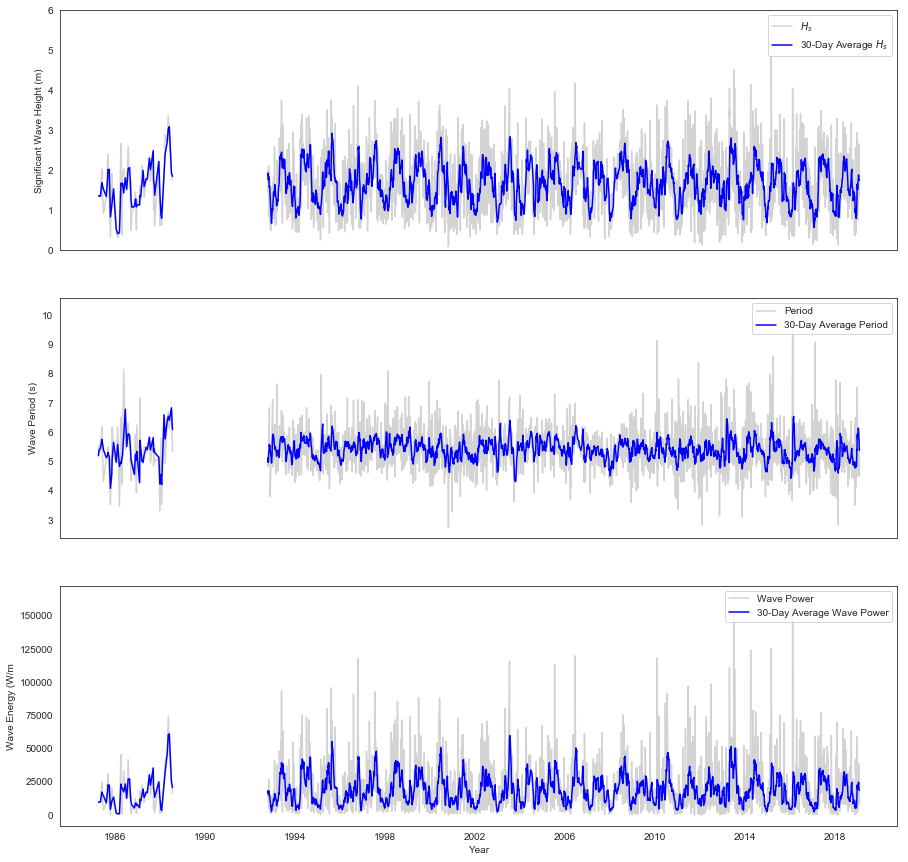

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex = True,figsize = (15,15))    


sns.set_style("white")
#fig.title("Innisfail 30 Day Moving Average Significant Wave Height")


#HS
#Before date break
ax1.plot(x1,y1,color='lightgrey',label="$H_s$")
ax1.plot(x1,yy1,color='blue',label="30-Day Average $H_s$")

#After date break
ax1.plot(x2,y2,color='lightgrey', label='False')
ax1.plot(x2,yy2,color='blue')

ax1.legend(labels=["$H_s$","30-Day Average $H_s$"], loc='upper right')
ax1.set_ylabel("Significant Wave Height (m)")
ax1.set_ylim(0,6)


#Wave Period 
#Before date break
ax2.plot(x1, time1, color='lightgrey')
ax2.plot(x1,tt1,color='blue')

#After date break
ax2.plot(x2,time2, color='lightgrey')
ax2.plot(x2,tt2,color='blue')

ax2.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax2.set_ylabel("Wave Period (s)")


#Wave Power - Need to add data
#Before date break
ax3.plot(x1, p1, color='lightgrey')
ax3.plot(x1, pp1,color='blue')

#After date break
ax3.plot(x2, p2,color='lightgrey')
ax3.plot(x2, pp2, color='blue')

ax3.legend(labels=['Wave Power',"30-Day Average Wave Power"], loc='upper right')
ax3.set_ylabel("Wave Energy (W/m") #Check if watts/metre is correct


#Formatting

plt.xlabel("Year")

#"years = pd.date_range(start='1985',end='2020', periods=10)
years = pd.date_range('2008','2015', freq='AS')

plt.savefig("Melville_timeseries")

In [ ]:
for k in range(len(days)):
    if wh[k]>4:
        print wh[k], alltime[k]

## Seasonal Kendall Test

In [ ]:
import pymannkendall as mk

data99 = np.random.rand(360,1)

result = mk.original_test(data99)
print(result)

In [ ]:
print result.slope

In [ ]:
wh

In [ ]:
result = mk.original_test(T)
print result

In [ ]:
result1 = mk.original_test(wh)
print result1

In [ ]:
result2 =mk.seasonal_test(wh, period=12)
result2